<a href="https://colab.research.google.com/github/paulopetrillo/FIAP_TECH_CHALENGE_01/blob/main/TECH_CHALENGE_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
!pip install yfinance

In [261]:
!pip install pandas

In [262]:
# Carrega/importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib


# carrega bilbioteca yfinance (sugerida pelo Prof. Daniel Lima) para carregar
# automaticamente os dados da BVSP (https://br.investing.com/indices/bovespa-historical-data)
import yfinance as yf

print('Versão do pandas => %s' % pd.__version__)
print('Versão do numpy => %s' % np.__version__)
print('Versão do matplotlib => %s' % matplotlib.__version__)
print('Versão do seaborn => %s' % sns.__version__ )
print('Versão do yfinance => %s' % yf.__version__ )



# "^BVSP" parametro para pegar a cotação da BVSP (Ibovespa (IBOV))
dados = yf.Ticker("^BVSP")

Versão do pandas => 2.2.2
Versão do numpy => 2.0.2
Versão do matplotlib => 3.10.0
Versão do seaborn => 0.13.2
Versão do yfinance => 0.2.65


In [263]:
# paranmetros completos para dowload dos dados da BVSP.
# Conforme: https://ranaroussi.github.io/yfinance/
dados = yf.Ticker("^BVSP")
dados.info
dados.calendar
dados.analyst_price_targets
dados.quarterly_income_stmt
# dados.history(start='2022-01-01', end='2025-07-19')
# dat.history(period='3y')
# dat.option_chain(dat.options[4]).calls

ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 


""


In [264]:
# documentação em: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
# https://github.com/ranaroussi/yfinance
# ----------------------------------------------------------------------------------
# periodstr
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max Default: 1mo Either Use period parameter or use start and end

# intervalstr
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo Intraday data cannot extend last 60 days

# start: str
# Download start date string (YYYY-MM-DD) or _datetime, inclusive. Default is 99 years ago E.g. for start=”2020-01-01”, the first data point will be on “2020-01-01”

# end: str
# Download end date string (YYYY-MM-DD) or _datetime, exclusive. Default is now E.g. for end=”2023-01-01”, the last data point will be on “2022-12-31”

In [265]:
# Atribuinda os dados a variável dados.
dados = dados.history(start='2022-01-01', end='2025-07-19')

# transforma dados em um Dataframe.
dados = pd.DataFrame(dados)

# verificando os tipos de cada coluna.
dados.info()

# Observação:
# A coluna "close" dos dados baixados refere-se a coluna "Último"
# dos dados do site "https://br.investing.com/indices/bovespa-historical-data".

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 885 entries, 2022-01-03 00:00:00-03:00 to 2025-07-18 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          885 non-null    float64
 1   High          885 non-null    float64
 2   Low           885 non-null    float64
 3   Close         885 non-null    float64
 4   Volume        885 non-null    int64  
 5   Dividends     885 non-null    float64
 6   Stock Splits  885 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 55.3 KB


In [266]:
# Verifica alguns valores do dataframe.
dados.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-14 00:00:00-03:00,136187.0,136187.0,134840.0,135299.0,7325600,0.0,0.0
2025-07-15 00:00:00-03:00,135298.0,136022.0,134380.0,135250.0,6904200,0.0,0.0
2025-07-16 00:00:00-03:00,135250.0,135641.0,134265.0,135511.0,7833200,0.0,0.0
2025-07-17 00:00:00-03:00,135515.0,135793.0,135016.0,135565.0,6800000,0.0,0.0
2025-07-18 00:00:00-03:00,135563.0,135563.0,133296.0,133382.0,10071800,0.0,0.0


In [267]:
# Descrição inicial dos campos
dados.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,885.000000,885.000000,885.000000,885.000000,8.850000e+02,885.0,885.0
mean,119436.471186,120318.637288,118584.101695,119463.548023,1.125683e+07,0.0,0.0
std,10687.158274,10593.779250,10784.084030,10689.524989,3.282133e+06,0.0,0.0
min,96119.000000,96971.000000,95267.000000,96121.000000,0.000000e+00,0.0,0.0
25%,110816.000000,112025.000000,109787.000000,110906.000000,9.211500e+06,0.0,0.0
50%,119180.000000,119939.000000,118487.000000,119221.000000,1.101380e+07,0.0,0.0
75%,128051.000000,128878.000000,127326.000000,128098.000000,1.308090e+07,0.0,0.0
max,141265.000000,141537.000000,140597.000000,141478.000000,2.602930e+07,0.0,0.0


In [268]:
# # Transpõe a tabela de resumo de dados estatísticos (describe).
# dados.describe().T

In [269]:
# Observação 1:
# Campos "Dividends" e "Stock Splits" não tem dados, portanto podem ser retirados.

# Retirando as colunas  "Dividends" e "Stock Splits"
dados = dados.drop(labels=['Dividends', 'Stock Splits'], axis=1)
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03 00:00:00-03:00,104823.0,106125.0,103413.0,103922.0,11128500
2022-01-04 00:00:00-03:00,103922.0,104276.0,103096.0,103514.0,11491600
2022-01-05 00:00:00-03:00,103514.0,103514.0,100850.0,101006.0,0
2022-01-06 00:00:00-03:00,101006.0,102235.0,101000.0,101561.0,11749200
2022-01-07 00:00:00-03:00,101561.0,102719.0,101104.0,102719.0,11733200


In [270]:
# Obsevação 2:
# A coluna "Date" está como índice da tabela.

# Mostra os dados
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03 00:00:00-03:00,104823.0,106125.0,103413.0,103922.0,11128500
2022-01-04 00:00:00-03:00,103922.0,104276.0,103096.0,103514.0,11491600
2022-01-05 00:00:00-03:00,103514.0,103514.0,100850.0,101006.0,0
2022-01-06 00:00:00-03:00,101006.0,102235.0,101000.0,101561.0,11749200
2022-01-07 00:00:00-03:00,101561.0,102719.0,101104.0,102719.0,11733200


In [271]:
from sqlite3 import Timestamp
from os import times_result
# Vamos criar uma coluna com os dados do indice do tipo data.

# Importa biblioteca para tratar datas
from datetime import datetime

# Cria coluna com as datas.
dados['Data'] = dados.index

# Formata para dia.mês.ano (o método "".dt.date" deixa o campo com tipo object).
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y').dt.date

# Define o indice do Data-Frame com a Data (facilita na busca por datas).
dados.index = pd.to_datetime(dados.Data, format='%d-%m-%Y')
# dados.index = pd.to_datetime(dados.index, format='%d-%m-%Y') ##<<< bastaria nesta celula

# Transforma o tipo da coluna "Data" de 'Object' para 'datetime64'.
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y')

# Informações dos dados (quantidade e tipo de dados).
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 885 entries, 2022-01-03 to 2025-07-18
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    885 non-null    float64       
 1   High    885 non-null    float64       
 2   Low     885 non-null    float64       
 3   Close   885 non-null    float64       
 4   Volume  885 non-null    int64         
 5   Data    885 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 48.4 KB


,Open,High,Low,Close,Volume,Data
Data,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,11128500,2022-01-03
2022-01-04,103922.0,104276.0,103096.0,103514.0,11491600,2022-01-04
2022-01-05,103514.0,103514.0,100850.0,101006.0,0,2022-01-05
2022-01-06,101006.0,102235.0,101000.0,101561.0,11749200,2022-01-06
2022-01-07,101561.0,102719.0,101104.0,102719.0,11733200,2022-01-07


In [272]:
# Testa busca de linhas do dataframe usando a data como indíce.
dados.loc['01-05-2024']

,2024-01-05
Open,131218.0
High,132635.0
Low,130579.0
Close,132023.0
Volume,9199700
Data,2024-01-05 00:00:00


In [273]:
# Alterando a ordem das colunas, apenas para ficar na mesma sequência que o site.
dados = dados[['Close', 'Open', 'High', 'Low', 'Volume', 'Data']]
dados.head()

,Close,Open,High,Low,Volume,Data
Data,,,,,,
2022-01-03,103922.0,104823.0,106125.0,103413.0,11128500,2022-01-03
2022-01-04,103514.0,103922.0,104276.0,103096.0,11491600,2022-01-04
2022-01-05,101006.0,103514.0,103514.0,100850.0,0,2022-01-05
2022-01-06,101561.0,101006.0,102235.0,101000.0,11749200,2022-01-06
2022-01-07,102719.0,101561.0,102719.0,101104.0,11733200,2022-01-07


In [274]:
# # Executar está célula caso queira apagar (dropar) a coluna "Data".
# dados.drop(labels=['Data'], axis=1, inplace=True)
# dados.head()

In [275]:
# Renomei as colunas conforme dados da BVSP.
dados.rename(columns={'Close':'Ultimo',
                      'Open':'Abertura',
                      'High':'Maxima',
                      'Low':'Minima'},inplace=True)
dados.info()
dados.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 885 entries, 2022-01-03 to 2025-07-18
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ultimo    885 non-null    float64       
 1   Abertura  885 non-null    float64       
 2   Maxima    885 non-null    float64       
 3   Minima    885 non-null    float64       
 4   Volume    885 non-null    int64         
 5   Data      885 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 80.7 KB


,Ultimo,Abertura,Maxima,Minima,Volume,Data
Data,,,,,,
2025-07-14,135299.0,136187.0,136187.0,134840.0,7325600,2025-07-14
2025-07-15,135250.0,135298.0,136022.0,134380.0,6904200,2025-07-15
2025-07-16,135511.0,135250.0,135641.0,134265.0,7833200,2025-07-16
2025-07-17,135565.0,135515.0,135793.0,135016.0,6800000,2025-07-17
2025-07-18,133382.0,135563.0,135563.0,133296.0,10071800,2025-07-18


In [276]:
type(dados.index)

pandas.core.indexes.datetimes.DatetimeIndex

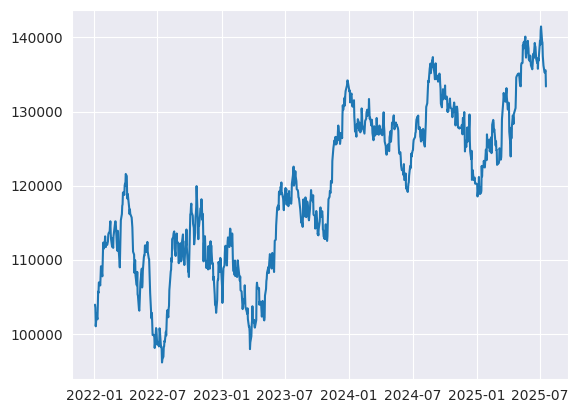

In [277]:
# Plotando os resultados do Valor de fechamento da bolsa (campo chamado "Último").
plt.plot(dados.index, dados['Ultimo'])
#plt.plot(dados.Data, dados['Último'])

In [278]:
resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=252)

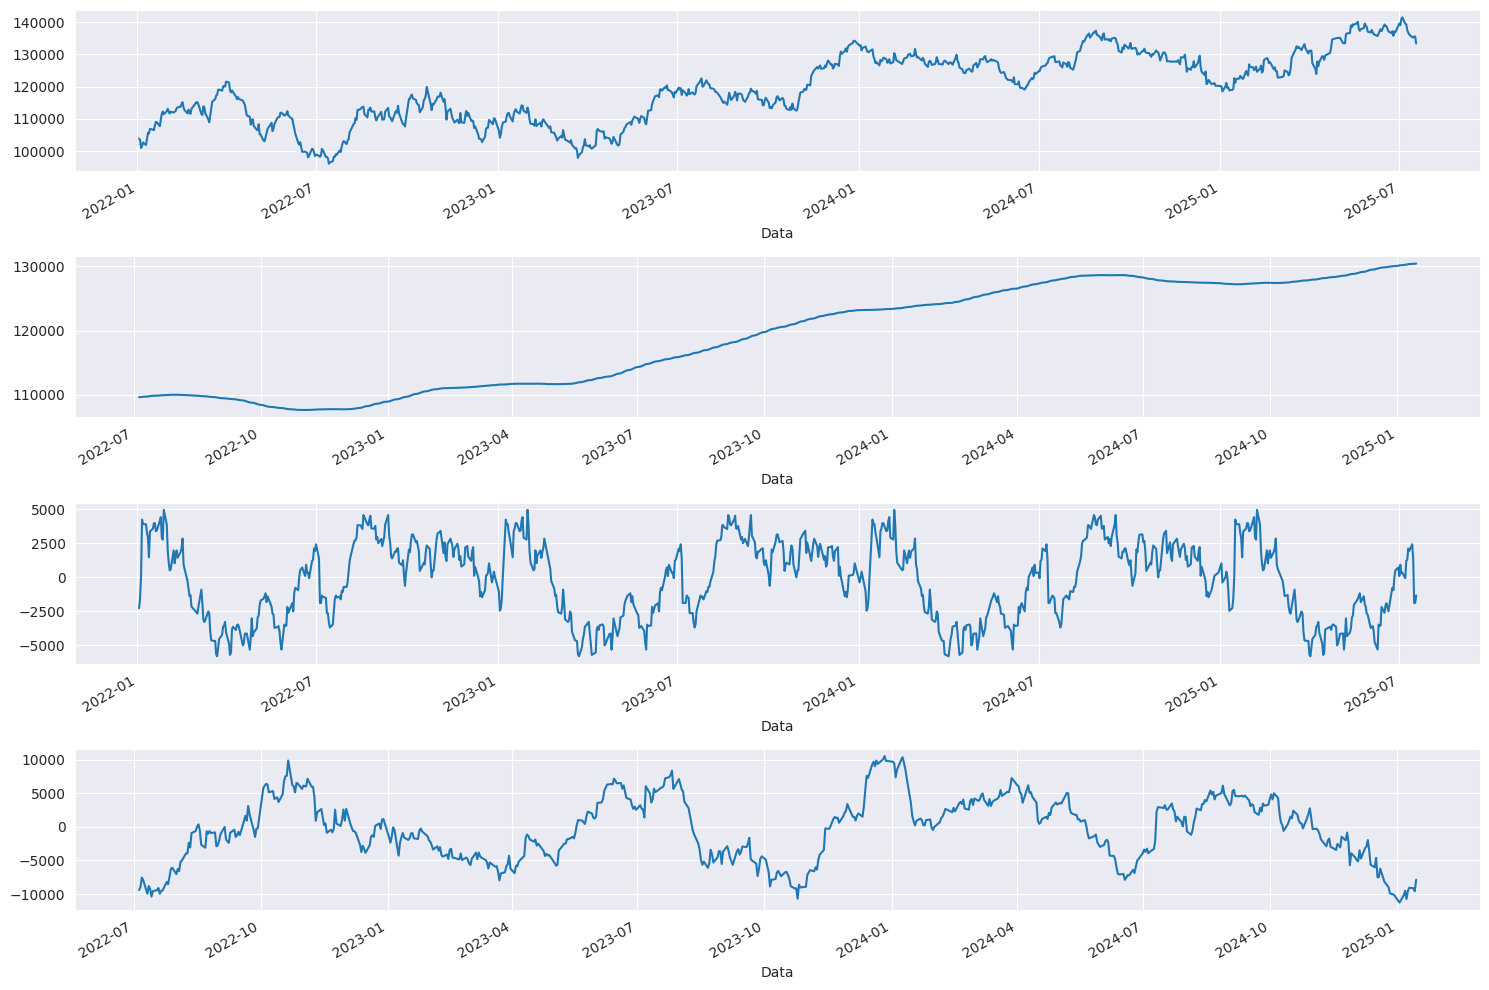

In [279]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [280]:
# tendência - direção (seta para cima, seta para baixo)
# sazonalidade - recorrência das oscilações
# resíduos - o que sobra do sinal - erros - desvio da média

In [281]:
# Veridficação quanto a série ser "estacionário" ou "não estacionário".

# ADF (Augmented Dickey-Fuller)
# H0 - Hipótese nula <=> Série NÃO é estacionário.
# H1 - Hipótese altrenativa <=> Sério é estacionário.

# p-value =< 0.05 (5%), então rejeitamos H0 com nível de confiança de 95%.
# SE (p-value menor ou igual À 5%) ENTÃO (rejeita H0)

# Mais genericamente:
# SE (teste aplicado =< p-value), ENTÃO (rejeitamos H0).
# SE (teste aplicado menor ou igual à p-value), ENTÃO (rejeitamos H0).

In [282]:
from statsmodels.tsa.stattools import adfuller

In [283]:
sns.set_style('darkgrid')

In [284]:
x = dados['Ultimo'].values

In [285]:
result =  adfuller(x)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

for key, value in result[4].items():
  print(f'{key}: {value}')

ADF Statistic: -1.8126467094378593
p-value: 0.3742012755433075
Critical Values: {'1%': np.float64(-3.4377689935918783), '5%': np.float64(-2.864815046188292), '10%': np.float64(-2.5685138660653957)}
1%: -3.4377689935918783
5%: -2.864815046188292
10%: -2.5685138660653957


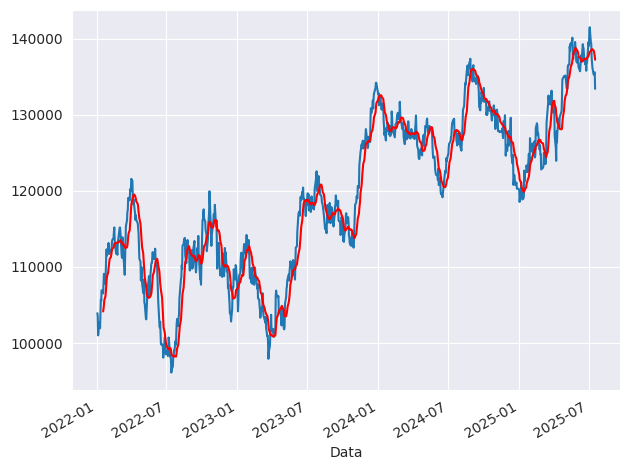

In [286]:
ma = dados.Ultimo.rolling(12).mean()

f, ax = plt.subplots()
#dados.select_dtypes(include=np.number).plot(ax=ax, legend=False)
dados.Ultimo.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

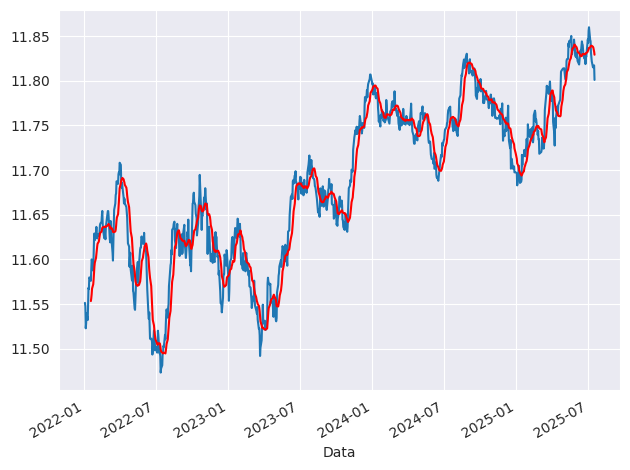

In [287]:
dados_Ultimo_log = np.log(dados.Ultimo)
ma_log = dados_Ultimo_log.rolling(12).mean()

f, ax = plt.subplots()
dados_Ultimo_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

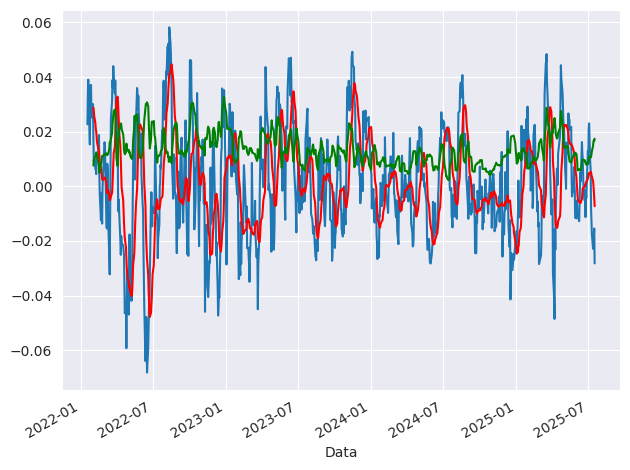

In [288]:
dados_Ultimo_s = (dados_Ultimo_log - ma_log).dropna()

ma_s = dados_Ultimo_s.rolling(12).mean()

std = dados_Ultimo_s.rolling(12).std()

f, ax = plt.subplots()
dados_Ultimo_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


In [289]:
X_s = dados_Ultimo_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -8.381317644488368
P-Value: 2.5056523156076756e-13
Valores críticos:
	1%: -3.437897435722137
	5%: -2.8648716746706326
	10%: -2.568544030438542


Teste ADF
Teste Estatístico: -21.682430675663174
P-Value: 0.0
Valores críticos:
	1%: -3.4377858660487277
	5%: -2.86482248517442
	10%: -2.5685178285796555


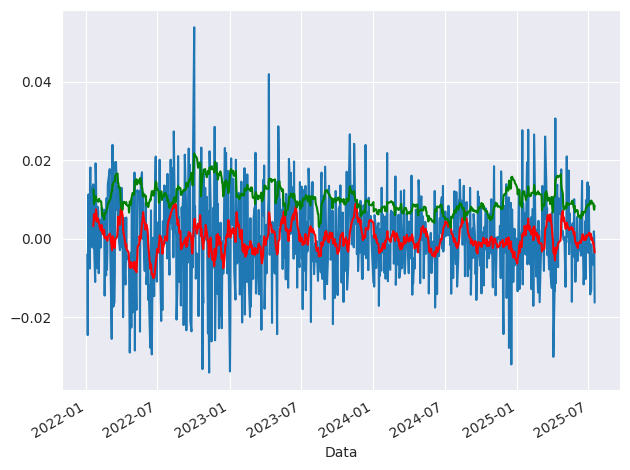

In [290]:
dados_Ultimo_diff = dados_Ultimo_log.diff(1)
ma_diff = dados_Ultimo_diff.rolling(12).mean()

std_diff = dados_Ultimo_diff.rolling(12).std()


f, ax = plt.subplots()
dados_Ultimo_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = dados_Ultimo_diff.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -10.821916605327656
P-Value: 1.7965910405344049e-19
Valores críticos:
	1%: -3.438003436504483
	5%: -2.864918407242872
	10%: -2.5685689238190808


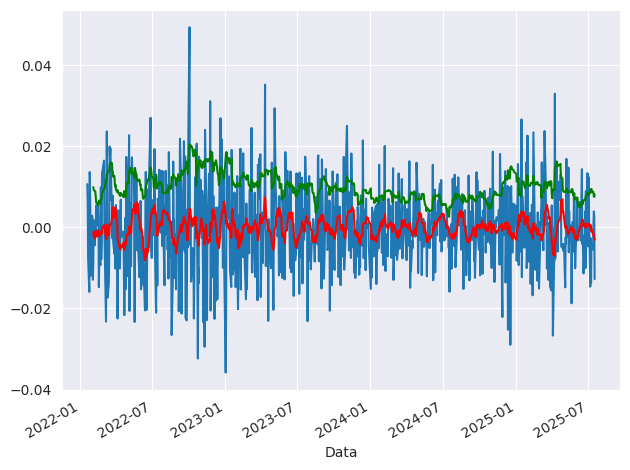

In [291]:
dados_Ultimo_diff = dados_Ultimo_s.diff(1)
ma_diff = dados_Ultimo_diff.rolling(12).mean()

std_diff = dados_Ultimo_diff.rolling(12).std()


f, ax = plt.subplots()
dados_Ultimo_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = dados_Ultimo_diff.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [292]:
# utiliza a biblioteca prophet
!pip install prophet

In [293]:
# carrega biblioteca prophet
from prophet import Prophet
import prophet

# verifica versão da biblioteca
print('Versão do Prophet => %s' % prophet.__version__ )

Versão do Prophet => 1.1.7


In [294]:
# copia os dados do Dataframe "dados" para usar com a biblioteca prophet.
df_dados_prophet = dados.copy().drop(labels=['Data'], axis=1)

# verificando base de dados
df_dados_prophet.info()
df_dados_prophet.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 885 entries, 2022-01-03 to 2025-07-18
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    885 non-null    float64
 1   Abertura  885 non-null    float64
 2   Maxima    885 non-null    float64
 3   Minima    885 non-null    float64
 4   Volume    885 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 73.8 KB


,Ultimo,Abertura,Maxima,Minima,Volume
Data,,,,,
2022-01-03,103922.0,104823.0,106125.0,103413.0,11128500
2022-01-04,103514.0,103922.0,104276.0,103096.0,11491600
2022-01-05,101006.0,103514.0,103514.0,100850.0,0
2022-01-06,101561.0,101006.0,102235.0,101000.0,11749200
2022-01-07,102719.0,101561.0,102719.0,101104.0,11733200


In [295]:
# Apaga indice como tipo "datetima"
df_dados_prophet = df_dados_prophet.reset_index()
# df_dados_prophet = df_dados_prophet.reset_index().rename(columns={'Data':'ds', 'Ultimo':'y'})

# mostra dados
df_dados_prophet.info()
df_dados_prophet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      885 non-null    datetime64[ns]
 1   Ultimo    885 non-null    float64       
 2   Abertura  885 non-null    float64       
 3   Maxima    885 non-null    float64       
 4   Minima    885 non-null    float64       
 5   Volume    885 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 41.6 KB


,Data,Ultimo,Abertura,Maxima,Minima,Volume
0,2022-01-03,103922.0,104823.0,106125.0,103413.0,11128500
1,2022-01-04,103514.0,103922.0,104276.0,103096.0,11491600
2,2022-01-05,101006.0,103514.0,103514.0,100850.0,0
3,2022-01-06,101561.0,101006.0,102235.0,101000.0,11749200
4,2022-01-07,102719.0,101561.0,102719.0,101104.0,11733200


In [296]:
# biblioteca prophet trabalh com apenas 2 colunas chamadas DS e Y.

# Apaga colunas 'High', 'Low', 'Close' e 'Volume'
df_dados_prophet.drop(labels=['Abertura', 'Maxima', 'Minima', 'Volume'], axis=1, inplace=True)

df_dados_prophet.info()
df_dados_prophet.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    885 non-null    datetime64[ns]
 1   Ultimo  885 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


,Data,Ultimo
0,2022-01-03,103922.0
1,2022-01-04,103514.0
2,2022-01-05,101006.0
3,2022-01-06,101561.0
4,2022-01-07,102719.0


In [297]:
#renomeia colunas 'Date' e 'Open' para 'ds' e 'y'
df_dados_prophet.rename(columns={'Data':'ds',
                                 'Ultimo':'y'},
                        inplace=True)

# mostra dados
df_dados_prophet.head()

,ds,y
0,2022-01-03,103922.0
1,2022-01-04,103514.0
2,2022-01-05,101006.0
3,2022-01-06,101561.0
4,2022-01-07,102719.0


In [298]:
# Separar os dados do dataframe em 2 grupos, um de treinamento para o modelo e outro para validação:

# Dados de treino
df_prophet_treino = df_dados_prophet.loc[df_dados_prophet['ds'] < '2025-05-01']

# Dados de teste (validação)
df_prophet_teste = df_dados_prophet.loc[df_dados_prophet['ds'] >= '2025-05-01']

In [299]:
# Verificando dados de treino:
df_prophet_treino.info()
df_prophet_treino.head()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 829
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      830 non-null    datetime64[ns]
 1   y       830 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.5 KB


,ds,y
0,2022-01-03,103922.0
1,2022-01-04,103514.0
2,2022-01-05,101006.0
3,2022-01-06,101561.0
4,2022-01-07,102719.0


In [300]:
# Verificando dados de teste:
df_prophet_teste.info()
df_prophet_teste.head()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 830 to 884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      55 non-null     datetime64[ns]
 1   y       55 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


,ds,y
830,2025-05-02,135134.0
831,2025-05-05,133491.0
832,2025-05-06,133516.0
833,2025-05-07,133398.0
834,2025-05-08,136232.0


In [301]:
# Roda o algoritmo "fit" para contruir um modelo preditivo.
m = Prophet()
df_prophet_treino['ds'] = df_prophet_treino['ds'].dt.tz_localize(None)
m.fit(df_prophet_treino)

/tmp/ipython-input-301-729218728.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvwqin242/iky6uzgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvwqin242/jkvtbfon.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32969', 'data', 'file=/tmp/tmpvwqin242/iky6uzgr.json', 'init=/tmp/tmpvwqin242/jkvtbfon.json', 'output', 'file=/tmp/tmpvwqin242/prophet_model5afbc2s9/prophet_model-20250725005826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:58:26 

In [302]:
# Número de dias previstos 252 -a partir de 02-01-2025 (02 de fevereiro de 2015)
future = m.make_future_dataframe(periods=252)
future.head()

,ds
0,2022-01-03
1,2022-01-04
2,2022-01-05
3,2022-01-06
4,2022-01-07


In [303]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1077,2026-01-03,125451.792199,89506.195331,161759.674849
1078,2026-01-04,125407.413373,89220.807745,161764.816003
1079,2026-01-05,130054.774133,93656.916231,166578.017134
1080,2026-01-06,130250.364511,93333.367540,167696.184284
1081,2026-01-07,130233.597358,93560.188390,167639.086984


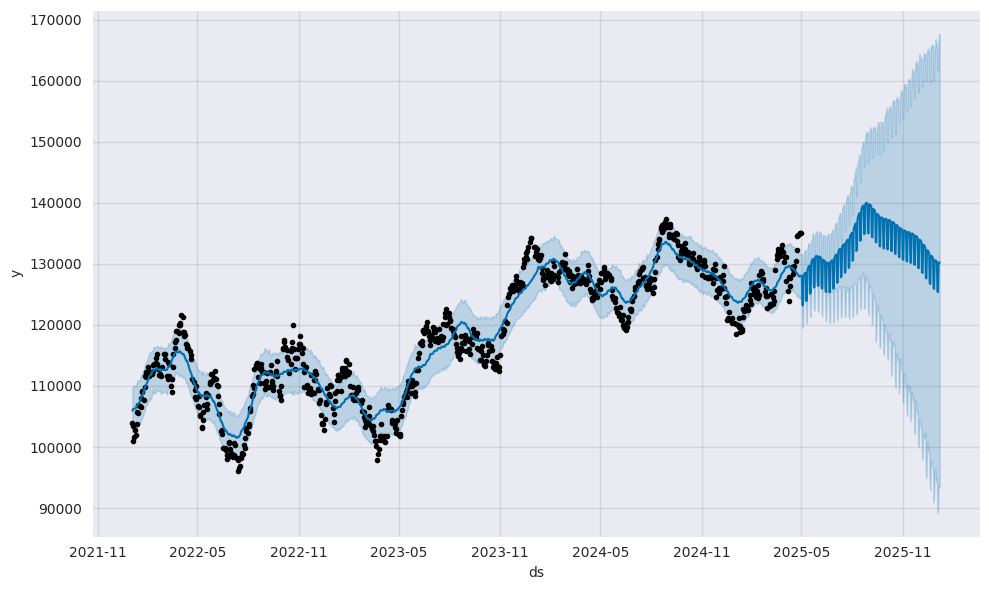

In [304]:
fig1 = m.plot(forecast)

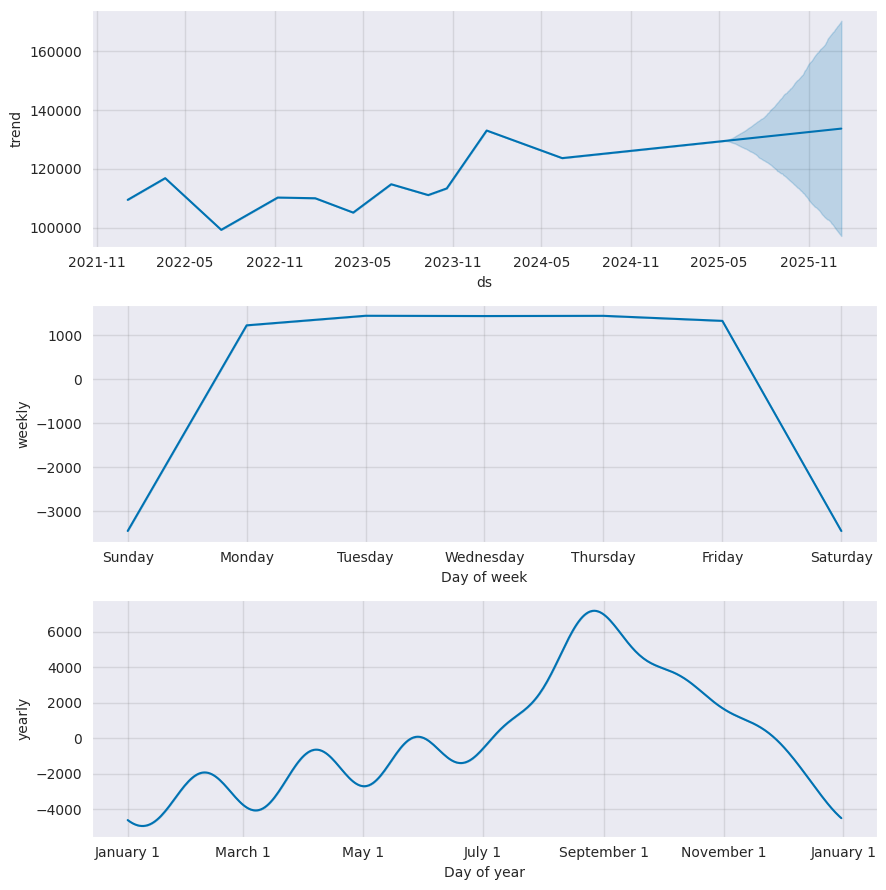

In [305]:
fig2 = m.plot_components(forecast)

In [306]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [307]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [308]:
# # modelo prophet com variação binaria da variavel target.
df_dados_prophet_bin = df_dados_prophet.copy()

In [309]:
# copiando coluna de verificação
df_dados_prophet_bin['col_conf']=df_dados_prophet_bin['y']
df_dados_prophet_bin.head()

,ds,y,col_conf
0,2022-01-03,103922.0,103922.0
1,2022-01-04,103514.0,103514.0
2,2022-01-05,101006.0,101006.0
3,2022-01-06,101561.0,101561.0
4,2022-01-07,102719.0,102719.0


In [310]:
# variável target como binária.
df_dados_prophet_bin['y'] = np.where(df_dados_prophet_bin['y'].shift(-1) > df_dados_prophet_bin['y'], 1, 0)

In [311]:
df_dados_prophet_bin.head(30)

,ds,y,col_conf
0,2022-01-03,0,103922.0
1,2022-01-04,0,103514.0
2,2022-01-05,1,101006.0
3,2022-01-06,1,101561.0
4,2022-01-07,0,102719.0
5,2022-01-10,1,101945.0
6,2022-01-11,1,103779.0
7,2022-01-12,0,105686.0
8,2022-01-13,1,105530.0
9,2022-01-14,0,106928.0


In [312]:
df_dados_prophet_bin.tail(30)

# apóss conferencia, retirar a coluna col_conf
df_dados_prophet_bin.drop(labels=['col_conf'], axis=1, inplace=True)

In [313]:
# Visualizando noda dataframe.
df_dados_prophet_bin.info()
df_dados_prophet_bin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      885 non-null    datetime64[ns]
 1   y       885 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.0 KB


,ds,y
0,2022-01-03,0
1,2022-01-04,0
2,2022-01-05,1
3,2022-01-06,1
4,2022-01-07,0


In [314]:
# Dados de treino
df_prophet_treino_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] < '2025-05-01']

# Dados de teste (validação)
df_prophet_teste_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] >= '2025-05-01']

In [315]:
# Verificando dados de treino:
df_prophet_treino_bin.info()
df_prophet_treino_bin.head()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 829
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      830 non-null    datetime64[ns]
 1   y       830 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.5 KB


,ds,y
0,2022-01-03,0
1,2022-01-04,0
2,2022-01-05,1
3,2022-01-06,1
4,2022-01-07,0


In [316]:
df_prophet_teste_bin.info()
df_prophet_teste_bin.head()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 830 to 884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      55 non-null     datetime64[ns]
 1   y       55 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


,ds,y
830,2025-05-02,0
831,2025-05-05,1
832,2025-05-06,0
833,2025-05-07,1
834,2025-05-08,1


In [317]:
# Roda o algoritmo "fit" para contruir um modelo preditivo.
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvwqin242/iz_60mzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvwqin242/5zc5efb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5907', 'data', 'file=/tmp/tmpvwqin242/iz_60mzu.json', 'init=/tmp/tmpvwqin242/5zc5efb0.json', 'output', 'file=/tmp/tmpvwqin242/prophet_modelvuv3t6s3/prophet_model-20250725005837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:58:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:58:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [318]:
# Número de dias previstos 252 -a partir de 02-01-2025 (02 de fevereiro de 2015)
future_bin = m_bin.make_future_dataframe(periods=252)
#future_bin.head()
future_bin.tail()

,ds
1077,2026-01-03
1078,2026-01-04
1079,2026-01-05
1080,2026-01-06
1081,2026-01-07


In [320]:
forecast_bin = m_bin.predict(future_bin)
forecast_bin[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50)

,ds,yhat,yhat_lower,yhat_upper
1032,2025-11-19,0.583449,-0.049507,1.190685
1033,2025-11-20,0.531143,-0.122082,1.201826
1034,2025-11-21,0.552056,-0.114242,1.201350
1035,2025-11-22,0.282459,-0.330582,0.980227
1036,2025-11-23,0.280732,-0.332097,0.895005
1037,2025-11-24,0.557464,-0.064920,1.223857
1038,2025-11-25,0.588132,-0.059333,1.191828
1039,2025-11-26,0.571927,-0.051386,1.176791
1040,2025-11-27,0.518390,-0.106284,1.118048
1041,2025-11-28,0.538338,-0.089298,1.150709
